In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interpolate
from PIL import Image

In [150]:
filename = "../data/weather_SF_2018.csv"
df = pd.read_csv(filename, delimiter=',')
df.tail(5)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
55627,1715626800,2024-05-13 19:00:00 +0000 UTC,-25200,Salesforce Tower,37.789744,-122.397234,286.07,NaN,283.96,285.69,...,3.58,NaN,NaN,NaN,NaN,57,803,Clouds,broken clouds,04d
55628,1715630400,2024-05-13 20:00:00 +0000 UTC,-25200,Salesforce Tower,37.789744,-122.397234,286.68,NaN,284.21,286.31,...,4.02,NaN,NaN,NaN,NaN,57,803,Clouds,broken clouds,04d
55629,1715634000,2024-05-13 21:00:00 +0000 UTC,-25200,Salesforce Tower,37.789744,-122.397234,287.18,NaN,284.52,286.83,...,4.02,NaN,NaN,NaN,NaN,57,803,Clouds,broken clouds,04d
55630,1715637600,2024-05-13 22:00:00 +0000 UTC,-25200,Salesforce Tower,37.789744,-122.397234,287.24,NaN,284.40,286.87,...,4.92,NaN,NaN,NaN,NaN,57,803,Clouds,broken clouds,04d
55631,1715641200,2024-05-13 23:00:00 +0000 UTC,-25200,Salesforce Tower,37.789744,-122.397234,287.74,NaN,284.71,287.40,...,5.81,NaN,NaN,NaN,NaN,61,803,Clouds,broken clouds,04d


In [151]:
unique_entries = df['weather_description'].unique()
print(unique_entries)

['overcast clouds' 'light rain' 'moderate rain' 'broken clouds'
 'scattered clouds' 'few clouds' 'sky is clear' 'heavy intensity rain'
 'very heavy rain']


In [152]:
unique_entries_count = df['weather_id'].value_counts()
print(unique_entries_count)
#note 804 means overcast clouds which sounds like fog

weather_id
800    15919
804    14716
803     8500
802     6764
801     4264
500     3974
501     1248
502      234
503       13
Name: count, dtype: int64


In [153]:
unique_entries_count = df['weather_description'].value_counts()
print(unique_entries_count)

weather_description
sky is clear            15919
overcast clouds         14716
broken clouds            8500
scattered clouds         6764
few clouds               4264
light rain               3974
moderate rain            1248
heavy intensity rain      234
very heavy rain            13
Name: count, dtype: int64


In [154]:
df['dt_iso'] = df.dt_iso.str[:-10]
df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1515369600,2018-01-08 00:00:00,-28800,Salesforce Tower,37.789744,-122.397234,284.66,NaN,282.23,284.09,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d
1,1515373200,2018-01-08 01:00:00,-28800,Salesforce Tower,37.789744,-122.397234,284.51,NaN,282.43,283.97,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d
2,1515376800,2018-01-08 02:00:00,-28800,Salesforce Tower,37.789744,-122.397234,284.19,NaN,282.28,283.65,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
3,1515380400,2018-01-08 03:00:00,-28800,Salesforce Tower,37.789744,-122.397234,283.76,NaN,282.52,283.28,...,NaN,NaN,NaN,NaN,NaN,99,804,Clouds,overcast clouds,04n
4,1515384000,2018-01-08 04:00:00,-28800,Salesforce Tower,37.789744,-122.397234,283.46,NaN,282.22,282.95,...,NaN,NaN,NaN,NaN,NaN,98,804,Clouds,overcast clouds,04n


In [155]:
df['timestamp']=pd.to_datetime(df['dt_iso'], format='%Y-%m-%d %H:%M:%S')
df = df.fillna(0.0)
keep = ['dt_iso','rain_1h', 'weather_id', 'temp', 'dew_point', 'timestamp','wind_gust', 'clouds_all']
df = df[keep]

In [156]:
df.head()

,dt_iso,rain_1h,weather_id,temp,dew_point,timestamp,wind_gust,clouds_all
0,2018-01-08 00:00:00,0.0,804,284.66,282.23,2018-01-08 00:00:00,0.0,100
1,2018-01-08 01:00:00,0.0,804,284.51,282.43,2018-01-08 01:00:00,0.0,100
2,2018-01-08 02:00:00,0.0,804,284.19,282.28,2018-01-08 02:00:00,0.0,100
3,2018-01-08 03:00:00,0.0,804,283.76,282.52,2018-01-08 03:00:00,0.0,99
4,2018-01-08 04:00:00,0.0,804,283.46,282.22,2018-01-08 04:00:00,0.0,98


In [157]:
df.dtypes

dt_iso                object
rain_1h              float64
weather_id             int64
temp                 float64
dew_point            float64
timestamp     datetime64[ns]
wind_gust            float64
clouds_all             int64
dtype: object

In [158]:
#trim
df.set_index(df['timestamp'], inplace=True)
start = pd.to_datetime('2022-12-21 22:00')
end = pd.to_datetime('2023-12-21 21:00')
df_2023 = df.loc[(df.index >= start) & (df.index <= end)]
df_2023['temp_dew_diff'] = df_2023['temp'] - df_2023['dew_point']
df_2023.head(10)

/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_5634/1013354378.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['temp_dew_diff'] = df_2023['temp'] - df_2023['dew_point']


,dt_iso,rain_1h,weather_id,temp,dew_point,timestamp,wind_gust,clouds_all,temp_dew_diff
timestamp,,,,,,,,,
2022-12-21 22:00:00,2022-12-21 22:00:00,0.0,802,285.43,278.13,2022-12-21 22:00:00,0.00,36,7.30
2022-12-21 23:00:00,2022-12-21 23:00:00,0.0,803,285.83,277.29,2022-12-21 23:00:00,0.00,58,8.54
2022-12-22 00:00:00,2022-12-22 00:00:00,0.0,804,285.54,277.52,2022-12-22 00:00:00,2.68,100,8.02
2022-12-22 01:00:00,2022-12-22 01:00:00,0.0,804,285.21,277.93,2022-12-22 01:00:00,0.00,99,7.28
2022-12-22 02:00:00,2022-12-22 02:00:00,0.0,804,284.95,278.37,2022-12-22 02:00:00,2.68,100,6.58
2022-12-22 03:00:00,2022-12-22 03:00:00,0.0,804,284.20,278.10,2022-12-22 03:00:00,0.00,97,6.10
2022-12-22 04:00:00,2022-12-22 04:00:00,0.0,804,283.74,278.91,2022-12-22 04:00:00,1.79,99,4.83
2022-12-22 05:00:00,2022-12-22 05:00:00,0.0,804,283.46,279.23,2022-12-22 05:00:00,0.00,99,4.23
2022-12-22 06:00:00,2022-12-22 06:00:00,0.0,804,282.85,279.02,2022-12-22 06:00:00,0.00,100,3.83


In [159]:
df_2023.shape

(8760, 9)

In [160]:
# Define the condition for dew_point within 5% of temp
condition = (df_2023['dew_point'] >= 0.99*df_2023['temp'])
df_filtered = df_2023[condition]
# Count the occurrences of weather_id equal to "804" and those that are not
count_804 = df_filtered[df_filtered['weather_id'] == 804].shape[0]
count_not_804 = df_filtered[df_filtered['weather_id'] != 804].shape[0]

# Display the counts
print(f"Number of entries with weather_id equal to '804': {count_804}")
print(f"Number of entries with weather_id not equal to '804': {count_not_804}")


Number of entries with weather_id equal to '804': 1606
Number of entries with weather_id not equal to '804': 3229


In [161]:
df_filtered.shape

(4835, 9)

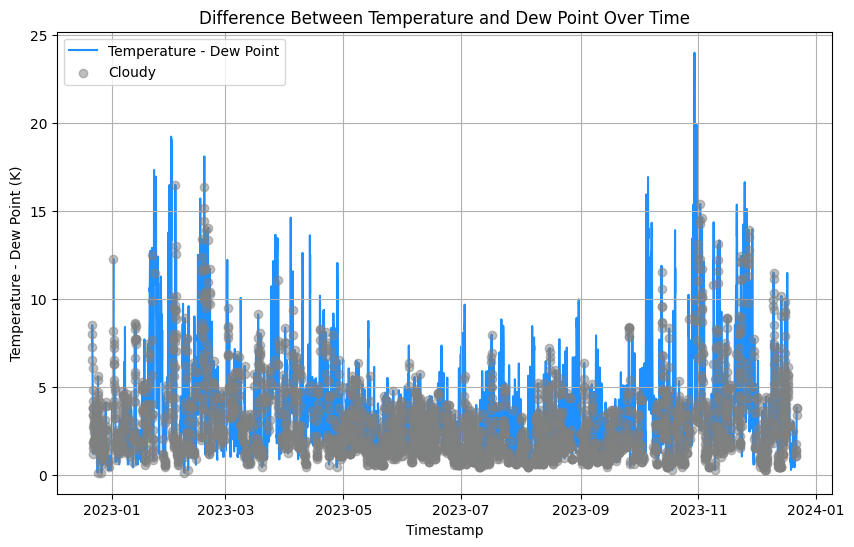

In [162]:
# Assuming df is your DataFrame and it is already indexed by 'timestamp'

# Create a new column for the difference between temperature and dew_point


# Filter points where weather_id is 804 or "cloudy"
fog = df_2023[((df_2023['weather_id'] == 804) | (df_2023['weather_id'] == 803)) & (df_2023['rain_1h'] == 0)]

# Plot the difference as a line and the cloudy days as a scatter plot
plt.figure(figsize=(10, 6))
plt.plot(df_2023.index, df_2023['temp_dew_diff'], color='dodgerblue', label='Temperature - Dew Point', zorder=1)
plt.scatter(fog.index, fog['temp_dew_diff'], color='grey',alpha=0.5,  label='Cloudy', marker='o', zorder=2)
plt.xlabel('Timestamp')
plt.ylabel('Temperature - Dew Point (K)')
plt.title('Difference Between Temperature and Dew Point Over Time')
plt.legend()
plt.grid(True)
plt.savefig('../img/cloundplot.pdf')
plt.show()

In [163]:
df_2023.to_csv('../data/fogseries_2023.csv',index=True)

In [164]:
fog.shape

(3737, 9)

In [165]:
#make an (L) type image 1 px wide by column # px tall using the normalized values of df_2023['temp_dew_diff'], scaled to 0-255
from PIL import Image
#get log

channel = "clouds_all"

transformed_values = np.log1p(df_2023[channel])
#transformed_values = df_2023[channel]

# Normalize the transformed values to the range 0-255
min_val = transformed_values.min()
max_val = transformed_values.max()
normalized_values = ((transformed_values - min_val) / (max_val - min_val)) * 255
normalized_values = normalized_values.astype(np.uint8)

# Create an image
height = len(normalized_values)
image = Image.new('L', (1, height))  # 'L' mode for grayscale
image.putdata(normalized_values)

# Save the image
image.save('../img/temp_dew_diff_image.png')

#scale the image to n pixels wide

# Scale the image to 1080 pixels wide
scaled_image = image.resize((420, height))

# Save the image
scaled_image.save('../img/'+channel+'_image_scaled.png')

# Optionally, display the image
scaled_image.show()